In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
########### c'est cette version qu'il faut installer car toute les version que j'installe ici ne marche pas j;ai pris celle qui marche sur mon pc
########## Ne pas executer deux fois (executer une fois et redemarrer l'environement et apres executer toute les cellule mais sauter celle si) #############

## la commande %%capture pour supprimer les sorties des cellules de code

%%capture
!pip install --upgrade tensorflow==2.12.0
!pip install transformers==4.37.1


In [ ]:
########### c'est cette version qu'il faut installer car toute les version que j'installe ici ne marche pas j'ai pris celle qui marche sur mon pc


import tensorflow as tf
import transformers

print("Version de TensorFlow :", tf.__version__)
print("Version de Transformers :", transformers.__version__)

Version de TensorFlow : 2.12.0
Version de Transformers : 4.37.1


In [ ]:
from google.colab import drive
import zipfile
import os
import pandas as pd
import shutil

drive.mount('/content/drive')

chemin_zip = "/content/drive/My Drive/yvanolfotso/dataset/Bell_DNS Dataset.zip"

repertoire_temporaire = "/content/extraction_temp"

# Fonction pour extraire les fichiers zip
def extraire_zip(chemin_zip, repertoire_temporaire):
    with zipfile.ZipFile(chemin_zip, 'r') as zip_ref:
        zip_ref.extractall(repertoire_temporaire)  # Extraction dans mon répertoire temporaire

# Fonction pour charger et concaténer les fichiers CSV
def charger_concatener_donnees(sous_dossier, prefixe):
    # Lister tous les fichiers CSV dans le sous-dossier
    fichiers_csv = [f for f in os.listdir(f"{repertoire_temporaire}/{sous_dossier}") if f.startswith(prefixe) and f.endswith('.csv')]
    # Lire chaque fichier CSV et le stocker dans une liste de DataFrames
    dataframes = [pd.read_csv(f"{repertoire_temporaire}/{sous_dossier}/{f}") for f in fichiers_csv]
    # Concaténer les DataFrames en un seul
    return pd.concat(dataframes, ignore_index=True)

# Extraire les fichiers zip
extraire_zip(chemin_zip, repertoire_temporaire)

# Charger et concaténer les données de chaque catégorie
benin_data = charger_concatener_donnees("Bell_DNS Dataset", "features_domain_benign")
malware_data = charger_concatener_donnees("Bell_DNS Dataset", "features-domain_Malware")
phishing_data = charger_concatener_donnees("Bell_DNS Dataset", "features-domain_phishing")
spam_data = charger_concatener_donnees("Bell_DNS Dataset", "features-domain_Spam")

# Supprimer le répertoire temporaire après avoir terminé
if os.path.exists(repertoire_temporaire):
    shutil.rmtree(repertoire_temporaire)



In [ ]:

# Ajout de la colonne 'Class'
benin_data['class'] = 'Benign'
balanced_benign = benin_data.sample(23716, random_state=42)

# Prélèvement d'échantillons pour l'ensemble équilibré
spam_data = spam_data.sample(7643, random_state=42,replace=True)
malware_data = malware_data.sample(7643, random_state=42)
phishing_data = phishing_data.sample(7643, random_state=42)

balanced_samples_malicioux = pd.concat([spam_data, malware_data, phishing_data], ignore_index=True)
balanced_samples_malicioux['class'] = 'Malicious'

print(balanced_samples_malicioux['class'].value_counts())

# balanced_samples_malicioux = balanced_samples_malicioux.sample(22929, random_state=42)
# print(balanced_samples_malicioux['Class'].value_counts())

print(balanced_benign['class'].value_counts())


data = pd.concat([balanced_samples_malicioux,balanced_benign],axis=0, ignore_index=True)


print("\n")
print(" Size all data shape")
print(data.shape)
print("\n")
print(data.columns)



In [ ]:
################## Les features ont deja été selectionné avec le code de feature selection dataset 2  en faisant l'union des 4 methodes ####################

X_numerical = data[['Page_Rank','puny_coded','entropy','len','numeric_percentage','dec_32','oc_32']]
X_categorical = data[['Unnamed: 34','char_distribution','Registrant_Name','Domain_Name',
                        'distance_from_bad_words','Creation_Date_Time','sld','1gram','2gram','3gram',
                        'shortened','obfuscate_at_sign','Country','Organization','State','Emails']]
y = data['class']

print(X_numerical.shape)
print(X_categorical.shape)
print(y.shape)

In [ ]:
from sklearn.impute import SimpleImputer

# Séparer les caractéristiques numériques et catégorielles

# Imputation des valeurs manquantes pour les caractéristiques numériques
numerical_imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(X_numerical), columns=X_numerical.columns)


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# 2. Vérification des colonnes vides
if X_numerical.isnull().any().any():
    # Imputer les valeurs manquantes pour les caractéristiques numériques
    numerical_imputer = SimpleImputer(strategy='mean')
    X_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(X_numerical), columns=X_numerical.columns)

    #prepocessing des features numeriques soit  avec le  LabelEncoder soit le MinMaxScaler()

    # Création d'un scaler
    scaler = MinMaxScaler()

    # Ajustement du scaler aux données
    scaler.fit(X_numerical_imputed)

    # Transformation des fonctionnalités numériques
    scaled_numeric_features = scaler.transform(X_numerical_imputed)

    # print(scaled_numeric_features)

    # Apres transformation Création d' un DataFrame à partir des valeurs transformées

    scaled_df = pd.DataFrame(scaled_numeric_features, columns=X_numerical_imputed.columns)

    # Afficher le DataFrame avec les valeurs transformées
    # print("Après transformation")
    print(scaled_df)

    total_size = scaled_df.shape
    print("Taille totale des caractéristiques numériques après transformations :", total_size)
else:
    print("Pas de valeurs manquantes dans les caractéristiques numériques. Aucune imputation nécessaire.")




               rr  A_frequency  FQDN_count     upper     lower   numeric  \
0        0.000000     0.000000    0.549329  0.021053  0.319895  0.434507   
1        0.000000     0.000000    0.549329  0.021053  0.319895  0.434507   
2        0.000000     0.000000    0.549329  0.021053  0.319895  0.434507   
3        0.000000     0.000000    0.549329  0.021053  0.319895  0.434507   
4        0.000000     0.000000    0.549329  0.021053  0.319895  0.434507   
...           ...          ...         ...       ...       ...       ...   
1327382  0.101451     0.101451    0.647059  0.000000  0.294118  0.666667   
1327383  0.101451     0.101451    0.735294  0.000000  0.294118  0.916667   
1327384  0.101451     0.101451    0.264706  0.000000  0.294118  0.000000   
1327385  0.101451     0.101451    0.647059  0.000000  0.294118  0.666667   
1327386  0.101451     0.101451    0.647059  0.000000  0.294118  0.666667   

          entropy   special    labels  labels_max  labels_average       len  
0        

In [ ]:
from sklearn.impute import SimpleImputer

# Vérification des colonnes vides
if X_categorical.isnull().any().any():
    # Imputer les valeurs manquantes pour les caractéristiques catégorielles
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(X_categorical), columns=X_categorical.columns)

    # Afficher le DataFrame avec les valeurs imputées
    print("Après imputation")
    print(X_categorical_imputed)

    total_size_categorical = X_categorical_imputed.shape

    print("Taille totale des caractéristiques catégorielles après imputation :", total_size_categorical)

else:
    print("Pas de valeurs manquantes dans les caractéristiques catégorielles. Aucune imputation nécessaire.")


Après imputation
         rr_type    unique_ttl                   timestamp longest_word  \
0        {'PTR'}        [1, 1]  2020-11-21 14:31:29.947599            2   
1        {'PTR'}        [1, 1]  2020-11-21 14:31:29.947599            2   
2        {'PTR'}           [1]  2020-11-21 14:31:29.947599            2   
3        {'PTR'}     [1, 1, 1]  2020-11-21 14:31:29.947599            2   
4        {'PTR'}  [1, 1, 1, 1]  2020-11-21 14:31:29.947599            2   
...          ...           ...                         ...          ...   
1327382    {'A'}        [1, 1]  2020-11-21 17:23:53.970643            4   
1327383    {'A'}        [1, 1]  2020-11-21 14:21:20.974091            2   
1327384    {'A'}        [1, 1]  2020-11-21 16:47:46.775938        arena   
1327385    {'A'}        [1, 1]  2020-11-21 15:30:48.467504            4   
1327386    {'A'}        [1, 1]  2020-11-21 17:56:31.624535            4   

             sld  
0            192  
1            192  
2            192  
3     

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel

# Créer un tokenizer DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Convertir les données catégorielles imputées en listes
categorical_features = [X_categorical_imputed[col].astype(str).tolist() for col in X_categorical_imputed.columns]

# Fusionner les textes catégoriels en une seule liste de textes
combined_texts = [' '.join([f"{col_value}" for col_value in row]) for row in zip(*categorical_features)]

# Tokeniser les textes combinés
tokens = tokenizer(combined_texts, padding=True, truncation=True, return_tensors='tf', max_length=64)

# Afficher les tokens
print(tokens)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


{'input_ids': <tf.Tensor: shape=(1327387, 62), dtype=int32, numpy=
array([[ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0],
       ...,
       [ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1327387, 62), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}


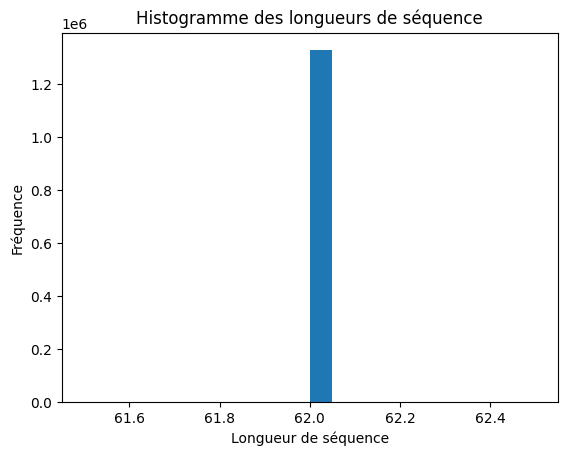

In [ ]:
# Obtenir les longueurs de séquence
sequence_lengths = [len(token_ids) for token_ids in tokens['input_ids'].numpy()]

# Afficher l'histogramme des longueurs de séquence
plt.hist(sequence_lengths, bins=20)
plt.title('Histogramme des longueurs de séquence')
plt.xlabel('Longueur de séquence')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
# deux methodes

# calcul longueur maximale
max_sequence_length = max(sequence_lengths)

# get l'indice de la plus longue séquence
indice_plus_longue_sequence = sequence_lengths.index(max_sequence_length)

# Longueur de la plus longue séquence
longueur_plus_longue_sequence = sequence_lengths[indice_plus_longue_sequence]

print(f"Longueur maximale du vecteur : {max_sequence_length}")
print(f"Longueur de la plus longue séquence : {longueur_plus_longue_sequence}")


Longueur maximale du vecteur : 62
Longueur de la plus longue séquence : 62


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import  LabelEncoder

# Entrées pour l'entraînement
data_num = scaled_df
data_text = pad_sequences(tokens['input_ids'].numpy(), maxlen=max_sequence_length, padding='post')

# verification les données numériques sont correctes
print("Shape of data_num:", data_num.shape)

# verification les données textuelles sont correctes après le rembourrage
print("Shape of data_text:", data_text.shape)

# verification les étiquettes sont correctes
print("Shape of labels:", y.shape)

# Encodage des étiquettes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Classes d'origine associées aux classes encodées:", label_encoder.classes_)
print(y_encoded)

print("\n")
print(type(data_text))
print(tokens['input_ids'].dtype)

In [ ]:
from transformers import TFDistilBertModel, DistilBertTokenizer
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers.legacy import Adam

# Entrées
input_num = layers.Input(shape=(scaled_df.shape[1],))
input_text_tokens = layers.Input(shape=(data_text.shape[1],), dtype=tf.int32)  # Utiliser les tokens pré-traités

# Branches du modèle
# Branche numérique - FFN
num_branch = layers.Dense(64, activation='relu')(input_num)
num_branch = layers.Dense(32, activation='relu')(num_branch)

# Branche textuelle - DistilBERT
distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')
outputs = distilbert_model(input_text_tokens)
text_output = outputs.last_hidden_state[:, 0, :]  # Accéder à la sortie des couches cachées

# Fusion des branches
merged = layers.concatenate([num_branch, text_output])

# Couches supplémentaires après la fusion
merged = layers.Dropout(0.5)(merged)
merged = layers.Dense(16, activation='relu')(merged)
output = layers.Dense(1, activation='sigmoid')(merged)

# Création et compilation du modèle
model = Model(inputs=[input_num, input_text_tokens], outputs=output)
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Diviser les données : entraînement et test
text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    data_text,
    scaled_df,
    y_encoded,
    test_size=0.2,
    random_state=42
)

# Définir le chemin pour sauvegarder les checkpoints
checkpoint_path = '/content/drive/My Drive/yvanolfotso/bestmodel/model_dataset2_checkpoint.h5'

# Créer le rappel ModelCheckpoint pour sauvegarder le meilleur modèle basé sur la validation accuracy
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False  # Sauvegardez le modèle complet, pas seulement les poids
)

# Entraîner le modèle en utilisant le rappel ModelCheckpoint
history = model.fit(
    [num_train, text_train],
    labels_train,
    epochs=15,
    batch_size=64,
    validation_data=([num_test, text_test], labels_test),
    callbacks=[checkpoint_callback]  # Ajouter le rappel ModelCheckpoint ici
)

# Charger le meilleur modèle à la fin de l'entraînement
from tensorflow.keras.models import load_model

best_model = load_model(checkpoint_path)

### ensuite j'utilise le best_model pour faire les prediction / evaluation sur les datas de test

Epoch 1/20
  779/16593 [>.............................] - ETA: 87:12:44 - loss: 1.0864 - accuracy: 0.4730

In [ ]:
!pip install keras-tuner


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from kerastuner.tuners import BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters
from transformers import TFDistilBertModel, DistilBertTokenizer
from tensorflow.keras import layers, Model, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers.legacy import Adam

# Fonction pour construire le modèle
def build_model(hp):
    input_num = Input(shape=(X_numerical.shape[1],))
    input_text_tokens = Input(shape=(data_text.shape[1],), dtype=tf.int32)

    # Branches du modèle
    # Branche numérique - FFN
    num_branch = layers.Dense(hp.Choice('num_units', values=[64, 128, 256]), activation='relu')(input_num)
    num_branch = layers.Dense(hp.Choice('num_units', values=[32, 64, 128]), activation='relu')(num_branch)

    # Branche textuelle - DistilBERT
    distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')
    outputs = distilbert_model(input_text_tokens)
    text_output = outputs.last_hidden_state[:, 0, :]

    # Fusion des branches
    merged = layers.concatenate([num_branch, text_output])

    # Couches supplémentaires après la fusion
    merged = layers.Dropout(hp.Choice('dropout', values=[0.3, 0.5]))(merged)
    merged = layers.Dense(hp.Choice('dense_units', values=[16, 32, 64]), activation='relu')(merged)

    output = layers.Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[input_num, input_text_tokens], outputs=output)

    # Optimiseur avec taux d'apprentissage variable
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])  # Ajout du taux d'apprentissage
    optimizer = Adam(learning_rate=lr)

    batch_size = hp.Choice('batch_size', values=[16, 32, 64])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Division des données en ensembles d'entraînement et de test
text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    data_text,
    scaled_df,
    y_encoded,
    test_size=0.2,
    random_state=42
)

drive_dir = '/content/drive/My Drive/yvanolfotso/besthyperparameter_tuning'

# Recherche des meilleurs hyperparamètres
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    hyperparameters=HyperParameters(),
    directory=drive_dir,
    project_name='distilbert_ffn_dataset2_hyperparam_tuning'
)

tuner.search([num_train, text_train], labels_train, epochs=5, validation_data=([num_test, text_test], labels_test))

# Obtention des meilleurs hyperparamètres trouvés
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print(f"Meilleurs hyperparamètres: {best_hps}")


In [ ]:
## affichage cle/valeur des meilleur hyperparametre

best_hyperparameters = best_hps.get_config()
print("Best Hyperparameters:")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")

In [ ]:

# Réutiliser les meilleurs hyperparamètres pour construire le modèle final
model = build_model(best_hps)

# Entraîner le modèle (REMPLACER MANUELLEMENT LE BATCH-SIZE) par la meilleur valeur
history = model.fit([num_train, text_train], labels_train, epochs=20, batch_size=64, validation_data=([num_test, text_test], labels_test))


In [ ]:
from sklearn.metrics import classification_report

# Évaluation du modèle sur les données de test
evaluation_results = model.evaluate([num_test, text_test], labels_test)

# Impression des résultats d'évaluation
print("Perte sur les données de test:", evaluation_results[0])
print("Précision sur les données de test:", evaluation_results[1])

# Prédiction sur les données de test
y_pred = model.predict([num_test, text_test])

print(y_pred)

# Convertir les indices des classes prédites en étiquettes
y_pred_classes = np.round(y_pred)

# Afficher le rapport de classification
class_report = classification_report(labels_test, y_pred_classes)
print("Rapport de classification :\n", class_report)


In [ ]:
# Affichage des courbes d'apprentissage et de validation
plt.figure(figsize=(12, 6))

# Plot de la perte d'entraînement et de la perte de validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Courbe de Perte')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot de la précision d'entraînement et de la précision de validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Courbe de Précision')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()

# Afficher les deux sous-plots
plt.tight_layout()
plt.show()

In [ ]:
#affichage de la matrixe de confusion

import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix


#calul preliminaire pour obtenir la matrice de confusion

conf_matrix = confusion_matrix(labels_test,y_pred)
true_negatives, false_positives,false_negatives, true_positives = conf_matrix.ravel()

# Créer la matrice de confusion
conf_matrix = np.array([[true_negatives, false_positives], [false_negatives, true_positives]])

# Afficher la matrice de confusion avec seaborn
df_cm = pd.DataFrame(conf_matrix, index=['Malicious 0', 'Benign 1'], columns=['Malicious 0', 'Benign 1'])
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
#Courbe de ROC

from sklearn.metrics import roc_curve, roc_auc_score

# Calcul des taux FPR et TPR
fpr, tpr, thresholds = roc_curve(labels_test, y_pred)

# Plotter la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# Calcul de l'AUC
auc = roc_auc_score(labels_test, y_pred)
print('Aire sous la courbe (AUC) :', auc)
